In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style 

In [0]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [383]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [384]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [385]:
round(((train_df.isnull().sum()/len(train_df))*100), 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [386]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [0]:
men = train_df[train_df['Sex'] == 'male']
women = train_df[train_df['Sex'] == 'female']

In [388]:
men['Cabin'].unique()

array([nan, 'E46', 'D56', 'A6', 'C23 C25 C27', 'B30', 'C52', 'C83',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'C123',
       'B86', 'F2', 'B19', 'A7', 'F4', 'A32', 'A31', 'C93', 'C78', 'D35',
       'C87', 'E67', 'B94', 'C118', 'A19', 'D', 'C106', 'C22 C26', 'C124',
       'C91', 'C2', 'T', 'C128', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'E12', 'E63', 'A14', 'B49',
       'B37', 'C30', 'C65', 'E25', 'D46', 'C95', 'B38', 'C86', 'C70',
       'A10', 'B41', 'A20', 'D19', 'D50', 'A23', 'B50', 'D33', 'A26',
       'D48', 'E58', 'B71', 'B51 B53 B55', 'D49', 'B20', 'C68', 'F G63',
       'E24', 'C126', 'E8', 'B101', 'D45', 'C46', 'B22', 'D30', 'E121',
       'F38', 'D6', 'B82 B84', 'A36', 'B102', 'C47', 'E17', 'A24', 'C148'],
      dtype=object)

In [389]:
women.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [390]:
women['Cabin'].unique()

array(['C85', nan, 'C123', 'G6', 'C103', 'B78', 'D33', 'B28', 'F33',
       'C23 C25 C27', 'E101', 'F E69', 'D47', 'C2', 'E33', 'C49', 'B4',
       'B80', 'D36', 'D15', 'C83', 'B77', 'C125', 'C99', 'D7', 'B49',
       'C22 C26', 'B58 B60', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'D', 'B18', 'E40', 'D37', 'B35', 'C78', 'B96 B98',
       'D21', 'C93', 'D20', 'B79', 'B73', 'B39', 'B22', 'A16', 'E67',
       'C101', 'E44', 'C68', 'E68', 'F4', 'D9', 'C126', 'B5', 'C62 C64',
       'C90', 'C45', 'D11', 'E77', 'B3', 'B20', 'D17', 'E8', 'B69',
       'E121', 'E49', 'C92', 'D28', 'D35', 'C50', 'B42'], dtype=object)

Text(0.5, 1.0, 'Female')

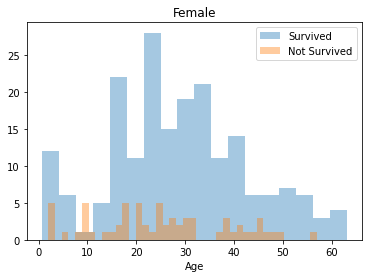

In [391]:
ax = sns.distplot(women[women['Survived'] == 1].Age, bins = 18, kde = False, label = 'Survived')
ax = sns.distplot(women[women['Survived'] == 0].Age, bins = 40, kde = False, label = 'Not Survived')
ax.legend()
ax.set_title('Female')

Text(0.5, 1.0, 'Male')

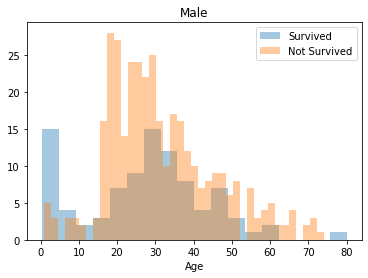

In [392]:
ax = sns.distplot(men[men['Survived'] == 1].Age, bins = 18, kde = False, label = 'Survived')
ax = sns.distplot(men[men['Survived'] == 0].Age, bins = 40, kde = False, label = 'Not Survived')
ax.legend()
ax.set_title('Male')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


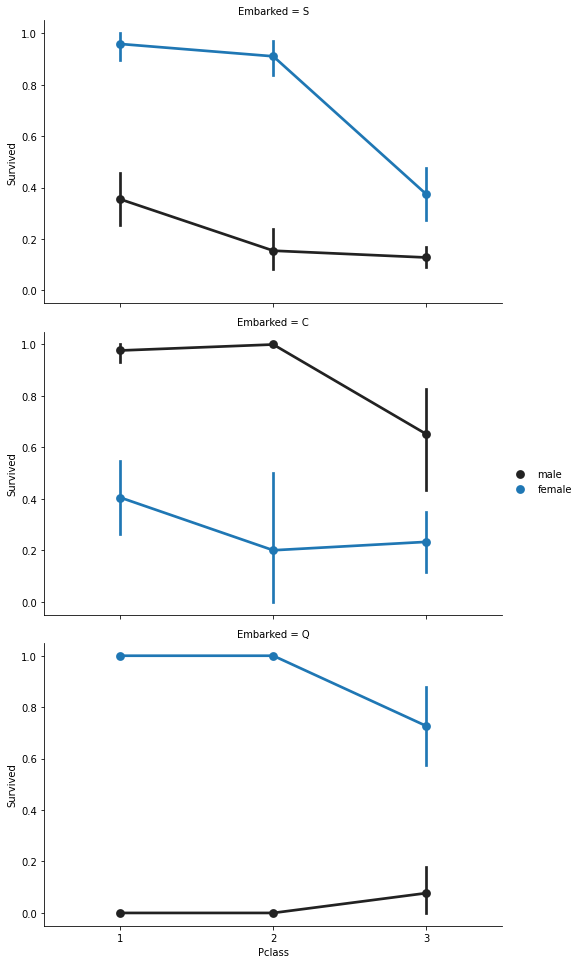

In [393]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size= 4.5, aspect = 1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', plette = None, order = None, hue_order = None)
FacetGrid.add_legend()

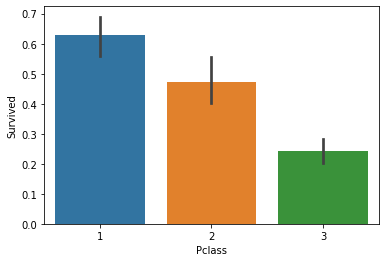

In [394]:
sns.barplot(x = 'Pclass' , y = 'Survived', data = train_df)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


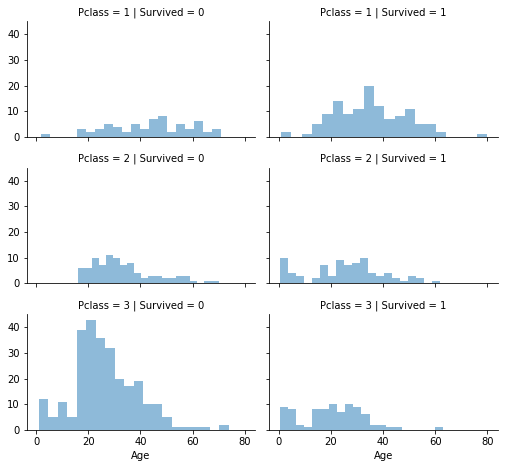

In [395]:
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)
grid.add_legend()

In [396]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Data Preprocessing

In [0]:
train_df = train_df.drop(['PassengerId'], axis = 1)

In [398]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
import re
deck = {"A" : 1,
        "B" : 2,
        "C" : 3,
        "D" : 4,
        "E" : 5,
        "F" : 6,
        "G" : 7,
        "H" : 8,
        }

data = [train_df, test_df]

for dataset in data:
  dataset['Cabin'] = dataset['Cabin'].fillna("U0")
  dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
  dataset['Deck'] = dataset['Deck'].map(deck)
  dataset['Deck'] = dataset['Deck'].fillna(0)
  dataset['Deck'] = dataset['Deck'].astype(int)



In [0]:
# data[0]

In [0]:
train_df = train_df.drop(['Cabin'], axis = 1)
test_df = test_df.drop(['Cabin'], axis = 1)

In [402]:
train_df['Deck'].unique()

array([0, 3, 5, 7, 4, 1, 2, 6])

In [0]:
data = [train_df, test_df]

for dataset in data:
  mean = train_df["Age"].mean()
  std = test_df["Age"].std()
  is_null = dataset["Age"].isnull().sum()
  #Compute random numbers between Mean and Standard Deviation
  rand_age = np.random.randint(mean - std, mean + std, size = is_null)

  age_slice = dataset["Age"].copy()
  age_slice[np.isnan(age_slice)] = rand_age
  dataset["Age"] = age_slice
  dataset["Age"] = train_df["Age"].astype(int)



In [404]:
train_df["Age"].isnull().sum()

0

In [405]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [0]:
common_val = 'S'
data = [train_df, test_df]

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].fillna(common_val)

In [407]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [0]:
for dataset in data:
  dataset['Fare'] = dataset['Fare'].fillna(0)
  dataset['Fare'] = dataset['Fare'].astype(int)

In [0]:
titles = {
    "Mr" : 1,
    "Miss" : 2,
    "Mrs" : 3,
    "Master" : 4,
    "Rare" : 5
}

In [0]:
for dataset in data:
  #Extract Titles
  dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand = True)
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
  dataset['Title'] = dataset['Title'].replace('Ms','Miss')

  #Convert title into Numbers
  dataset['Title'] = dataset['Title'].map(titles)
  dataset['Title'].fillna(0)
  

In [0]:
train_df = train_df.drop(['Name'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)

In [412]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,0,1.0
1,1,1,female,38,1,0,PC 17599,71,C,3,3.0
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,2.0
3,1,1,female,35,1,0,113803,53,S,3,3.0
4,0,3,male,35,0,0,373450,8,S,0,1.0


In [0]:
genders = {"male" : 0,
           "female" : 1}
data = [train_df, test_df]

for dataset in data:
  dataset['Sex'] = dataset['Sex'].map(genders)



In [0]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [415]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22,1,0,7,S,0,1.0
1,1,1,1,38,1,0,71,C,3,3.0
2,1,3,1,26,0,0,7,S,0,2.0
3,1,1,1,35,1,0,53,S,3,3.0
4,0,3,0,35,0,0,8,S,0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,S,0,5.0
887,1,1,1,19,0,0,30,S,2,2.0
888,0,3,1,35,1,2,23,S,0,2.0
889,1,1,0,26,0,0,30,C,3,1.0


In [0]:
ports = {'S' : 0, 
         'C' : 1, 
         'Q' : 2}
data = [train_df, test_df]

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].map(ports)

In [417]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22,1,0,7,0,0,1.0
1,1,1,1,38,1,0,71,1,3,3.0
2,1,3,1,26,0,0,7,0,0,2.0
3,1,1,1,35,1,0,53,0,3,3.0
4,0,3,0,35,0,0,8,0,0,1.0
5,0,3,0,35,0,0,8,2,0,1.0
6,0,1,0,54,0,0,51,0,5,1.0
7,0,3,0,2,3,1,21,0,0,4.0
8,1,3,1,27,0,2,11,0,0,3.0
9,1,2,1,14,1,0,30,1,0,3.0


In [418]:
for dataset in data:
  dataset['Age'] = dataset['Age'].astype(int)
  dataset.loc[dataset['Age'] <=11, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
  dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
  dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
  dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
  dataset.loc[(dataset['Age'] > 66), 'Age'] = 7

train_df['Age']

0      2
1      5
2      3
3      5
4      5
      ..
886    3
887    2
888    5
889    3
890    4
Name: Age, Length: 891, dtype: int64

In [419]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age           int64
SibSp         int64
Parch         int64
Fare          int64
Embarked      int64
Deck          int64
Title       float64
dtype: object

In [420]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,2,1,0,7,0,0,1.0
1,1,1,1,5,1,0,71,1,3,3.0
2,1,3,1,3,0,0,7,0,0,2.0
3,1,1,1,5,1,0,53,0,3,3.0
4,0,3,0,5,0,0,8,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,13,0,0,5.0
887,1,1,1,2,0,0,30,0,2,2.0
888,0,3,1,5,1,2,23,0,0,2.0
889,1,1,0,3,0,0,30,1,3,1.0


In [421]:
  train_df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age           int64
SibSp         int64
Parch         int64
Fare          int64
Embarked      int64
Deck          int64
Title       float64
dtype: object

In [0]:
data = [train_df, test_df]

for dataset in data:
  dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454) , 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31 ) , 'Fare'] = 2
  dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99) , 'Fare'] = 3
  dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250) , 'Fare'] = 4
  dataset.loc[(dataset['Fare'] > 250), 'Fare'] = 5
  dataset['Fare'] = dataset['Fare'].astype(int)

In [423]:
train_df['Fare'].unique()

array([0, 3, 1, 2, 5, 4])

In [0]:
# train_df.head(10)

#New Features

In [0]:
#Age*Class
data = [train_df, test_df]

for dataset in data:
  dataset['Age_Class'] = dataset['Age'] * dataset['Pclass']

In [426]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Age_Class
0,0,3,0,2,1,0,0,0,0,1.0,6
1,1,1,1,5,1,0,3,1,3,3.0,5
2,1,3,1,3,0,0,0,0,0,2.0,9
3,1,1,1,5,1,0,3,0,3,3.0,5
4,0,3,0,5,0,0,1,0,0,1.0,15


In [0]:
data = [train_df, test_df]

for dataset in data:
  dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
  dataset.loc[dataset['relatives'] > 0, 'not_alone']  = 0
  dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
  dataset['not_alone'] = dataset['not_alone'].astype(int)

In [428]:
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [429]:
train_df['relatives'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: relatives, dtype: int64

In [0]:
#Fare-per-Person
data = [train_df, test_df]

for dataset in data:
  dataset['Fare_Per_Person'] = dataset['Fare'] / (dataset['relatives'] + 1)
  dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [431]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Age_Class,relatives,not_alone,Fare_Per_Person
0,0,3,0,2,1,0,0,0,0,1.0,6,1,0,0
1,1,1,1,5,1,0,3,1,3,3.0,5,1,0,1
2,1,3,1,3,0,0,0,0,0,2.0,9,0,1,0
3,1,1,1,5,1,0,3,0,3,3.0,5,1,0,1
4,0,3,0,5,0,0,1,0,0,1.0,15,0,1,1
5,0,3,0,5,0,0,1,2,0,1.0,15,0,1,1
6,0,1,0,6,0,0,3,0,5,1.0,6,0,1,3
7,0,3,0,0,3,1,2,0,0,4.0,0,4,0,0
8,1,3,1,3,0,2,1,0,0,3.0,9,2,0,0
9,1,2,1,1,1,0,2,1,0,3.0,2,1,0,1


In [432]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Age_Class,relatives,not_alone,Fare_Per_Person
0,892,3,0,2,0,0,0,2,0,1,6,0,1,0
1,893,3,1,5,1,0,0,0,0,3,15,1,0,0
2,894,2,0,3,0,0,1,2,0,1,6,0,1,1
3,895,3,0,5,0,0,1,0,0,1,15,0,1,1
4,896,3,1,5,1,1,1,0,0,3,15,2,0,0


#Building Model


In [0]:
X_train = train_df.drop("Survived" , axis = 1)
y_train = train_df["Survived"]

In [0]:
X_test = test_df.drop("PassengerId",axis = 1).copy()

#Stochastic Gradient Descent

In [0]:
# X_train[X_train['Title'].isnull() == True]

In [0]:
# X_train['Title'].dropna(inplace = True)

In [0]:
# y_train.drop(index = 369, inplace = True)

In [438]:
np.isnan(X_train).any()

Pclass             False
Sex                False
Age                False
SibSp              False
Parch              False
Fare               False
Embarked           False
Deck               False
Title               True
Age_Class          False
relatives          False
not_alone          False
Fare_Per_Person    False
dtype: bool

In [0]:
X_train.dropna(inplace = True)

In [440]:
X_train.shape

(890, 13)

In [0]:
y_train.drop(index = 369, inplace = True)

In [0]:
from sklearn import linear_model
sgd = linear_model.SGDClassifier(max_iter = 5, tol = None) 

In [443]:
X_train['Title'].astype(int)

0      1
1      3
2      2
3      3
4      1
      ..
886    5
887    2
888    2
889    1
890    1
Name: Title, Length: 890, dtype: int64

In [444]:
%time sgd.fit(X_train, y_train)

CPU times: user 3.83 ms, sys: 0 ns, total: 3.83 ms
Wall time: 5.22 ms


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
Y_pred = sgd.predict(X_test)

In [446]:
len(Y_pred)

418

In [0]:
# Y_pred
# Survival Prediction of people in test set.

In [0]:
sc1 = sgd.score(X_train, y_train)

In [476]:
accuracy_sgd = round(sc1 * 100 , 2)
print(accuracy_sgd)

81.91


# Random Forest

In [450]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
%time rf.fit(X_train, y_train)

CPU times: user 301 ms, sys: 91.6 ms, total: 392 ms
Wall time: 272 ms


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
Y_pred_rf = rf.predict(X_test)
sc2 = rf.score(X_train, y_train)

In [479]:
accuracy_rf = round(sc2*100 ,2)
accuracy_rf

92.58

#Logistic Regression

In [453]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
%time lr.fit(X_train, y_train)

CPU times: user 36.7 ms, sys: 23.4 ms, total: 60.2 ms
Wall time: 42.1 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = lr.predict(X_test)

In [481]:
sc3 = lr.score(X_train, y_train)
accuracy_logisticreg = round(sc3*100,2)
accuracy_logisticreg

81.69

#K Nearest Neighbours

In [456]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
%time knn.fit(X_train, y_train)


CPU times: user 4.26 ms, sys: 5.94 ms, total: 10.2 ms
Wall time: 8.12 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [482]:
knn.predict(X_test)
sc4 = knn.score(X_train, y_train)
accuracy_knn = round(sc4 * 100 ,2)
accuracy_knn

84.27

#Gaussian Naive Bayes

In [484]:
from sklearn.naive_bayes import GaussianNB

g = GaussianNB()
%time g.fit(X_train, y_train)
Y_pred_g = g.predict(X_test)

sc5 = g.score(X_train, y_train)

CPU times: user 3.07 ms, sys: 6 µs, total: 3.07 ms
Wall time: 8.36 ms


In [485]:
accuracy_g = round(sc5*100,2)
accuracy_g

78.43

#Perceptron

In [0]:
from sklearn.linear_model import Perceptron 

In [461]:
per =  Perceptron(max_iter = 5)
%time per.fit(X_train, y_train)

CPU times: user 3.86 ms, sys: 0 ns, total: 3.86 ms
Wall time: 6 ms


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=5, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_test = per.predict(X_test)

In [486]:
sc6 = per.score(X_train, y_train)
accuracy_per = round(sc6*100,2)
accuracy_per

79.33

#Linear SVM

In [0]:
from sklearn.svm import LinearSVC

In [465]:
svm = LinearSVC()
%time svm.fit(X_train, y_train)

CPU times: user 87.1 ms, sys: 74.5 ms, total: 162 ms
Wall time: 87.7 ms


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
y_pred_svm = svm.predict(X_test)

In [487]:
sc7 = svm.score(X_train,y_train)
accuracy_svm = round(sc7*100,2)
accuracy_svm

81.57

#Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [469]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [488]:
sc8 = dt.score(X_train,y_train)
accuracy_dt = round(sc8*100, 2)
accuracy_dt

92.58

In [0]:
y_pred =  dt.predict(X_test)

In [0]:
import pandas as pd

In [0]:
results = pd.DataFrame({
    'Model' : ['SVM','KNN','Logistic Regression','Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Descent','Decision Tree'],
    'Score' : [accuracy_svm, accuracy_knn, accuracy_logisticreg, accuracy_rf, accuracy_g, accuracy_per, accuracy_sgd, accuracy_dt]
})


In [0]:
result_df = results.sort_values(by = 'Score', ascending = False)
result_df = result_df.set_index('Model')

In [492]:
result_df

,Score
Model,
Random Forest,92.58
Decision Tree,92.58
KNN,84.27
Stochastic Gradient Descent,81.91
Logistic Regression,81.69
SVM,81.57
Perceptron,79.33
Naive Bayes,78.43
